# What is diabetes ?
Acccording to NIH, "Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

## About dataset

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1).








In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Read data
Loading dataset with pandas (pd)

In [64]:
df = pd.read_csv('Dataset\diabetes.csv')


In [65]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [66]:
df.shape

(768, 9)

# Data profilling and Inspection

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* In this dataset has 768 not-null rows out of 0 to 767 rows .



The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



## Checking Statistics


In [68]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Among the features, there are many features whose min() values is 0. let's check out more of these features.

## Handling Missing values

In [69]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are not a null values.

In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [71]:
import numpy as np
#This function highlight the minimum values for every columns
def highlight_min(s,props = ''):
    return np.where(s == np.nanmin(s.values), props,'')

df.describe().style.apply(highlight_min,props='color:Black;background-color:Grey')

This summary shows the some columns has minimum values of below zero(0).

So, on these columns, a value of Zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:

1. Pregnancies

2. Glucose

3. BloodPressure

4. SkinThickness

5. Insulin

6. BMI

<b> so, It is better to replace zeros with NaN since after that counting them would be easier and NaN values should be need to replaced with suitable values.</b>

In [72]:
df_new = df
df_new[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=df_new[["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.NaN)

In [73]:
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [74]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

There are high null value in Insulin 374 and low null value in Glucose 5.

So, we need to fill the null values to understood the data distribution.

Some method to fill the Null values:

* Mean : Mean are used when the less outlier in our dataset because, mean are sensitive to outlier.
* Meadian : Median are used when the more outlier because it is less sensitive to outlier as compare to Mean.

## Visulize the nan values

<Axes: >

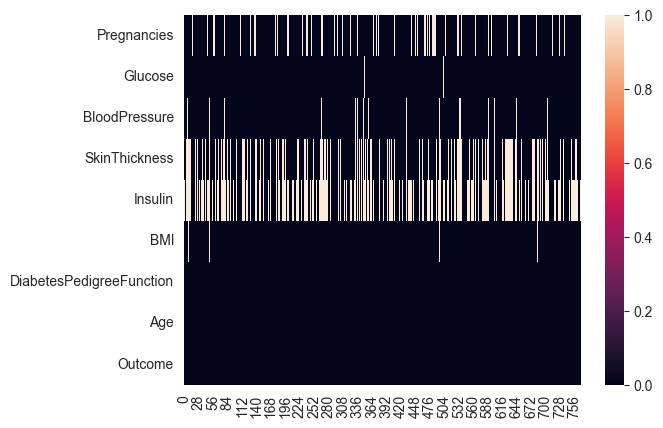

In [75]:
sns.heatmap(df.isna().T)

In this heatmap white color show the null values. In certail columns:

* Pregnancies                 
* Glucose                       
* BloodPressure                
* SkinThickness              
* Insulin                    
* BMI 

Text(0.5, 1.0, 'Matrix Plot of Missing Values')

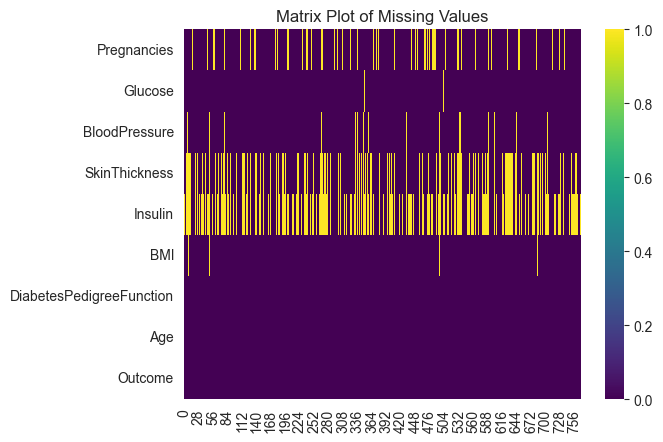

In [76]:
sns.heatmap(df.isnull().T, cmap='viridis', cbar=True, yticklabels=True)
plt.title('Matrix Plot of Missing Values')


In [77]:
# Count diabetes shoub be positive or negative
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 -> Non-Diabetic

1 -> Diabetic

In [78]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.861827  110.643863      70.877339      27.235457  130.287879   
1           5.669565  142.319549      75.321429      33.000000  206.846154   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.859674                  0.429734  31.190000  
1        35.406767                  0.550500  37.067164

<Axes: xlabel='Outcome', ylabel='count'>

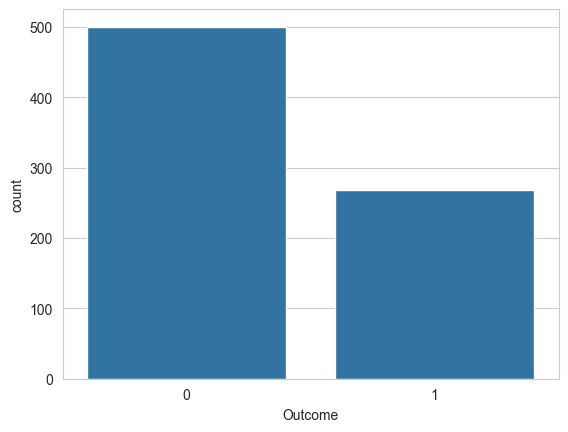

In [79]:
sns.countplot(x='Outcome',data=df)

* If Dependent (y) has an imbalance values in categorical data we cann't predict a model

([<matplotlib.patches.Wedge at 0x27d4bbad410>,
 [Text(-0.5025943242672991, 0.9784676515931925, '0'),
  Text(0.5025944158780503, -0.9784676045369114, '1')],
 [Text(-0.27414235869125403, 0.5337096281417413, '65.10%'),
  Text(0.2741424086607547, -0.5337096024746789, '34.90%')])

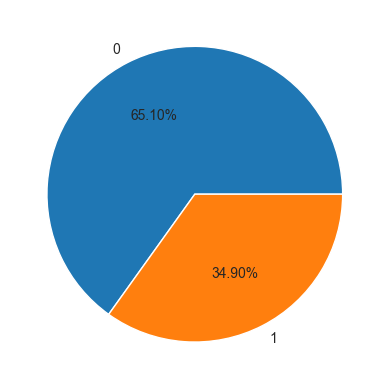

In [80]:
s = df.Outcome.value_counts()
plt.pie(x=s.values,labels=s.index,autopct='%.2f%%')

* Class 0 is 65% and class 1 is 35% which means data is imbalance.

If data is imbalance we use Oversampling and Undersampling technique to balace the data, or use SMOTE technique. If the data is imbalance accuracy mightnot be a good metic.

* Undersampling :  To remove the sample to equal the majority data.

* Oversampling : Duplicate the sample to eqaul the minority data.


In [81]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.166329       0.285013       0.167298   
Glucose                      0.166329  1.000000       0.223192       0.228043   
BloodPressure                0.285013  0.223192       1.000000       0.226839   
SkinThickness                0.167298  0.228043       0.226839       1.000000   
Insulin                      0.104081  0.581186       0.098272       0.184888   
BMI                          0.128207  0.232771       0.289230       0.648214   
DiabetesPedigreeFunction    -0.006459  0.137246      -0.002805       0.115016   
Age                          0.550525  0.267136       0.330107       0.166816   
Outcome                      0.268218  0.494650       0.170589       0.259491   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.104081  0.128207                 -0.006459   
Glucose                   0.581186  0.232771                  0.137246   
BloodPressure             0.098272  0.289230                 -0.002805   
SkinThickness             0.184888  0.648214                  0.115016   
Insulin                   1.000000  0.228050                  0.130395   
BMI                       0.228050  1.000000                  0.155382   
DiabetesPedigreeFunction  0.130395  0.155382                  1.000000   
Age                       0.220261  0.025841                  0.033561   
Outcome                   0.303454  0.313680                  0.173844   

                               Age   Outcome  
Pregnancies               0.550525  0.268218  
Glucose                   0.267136  0.494650  
BloodPressure             0.330107  0.170589  
SkinThickness             0.166816  0.259491  
Insulin                   0.220261  0.303454  
BMI                       0.025841  0.313680  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

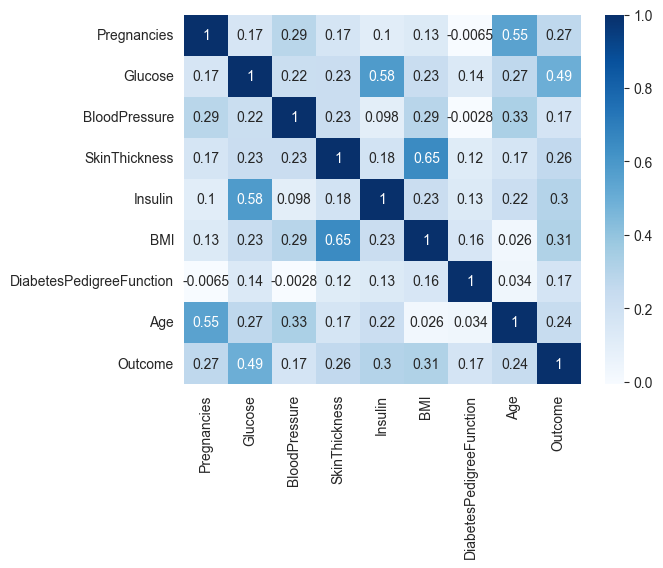

In [82]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

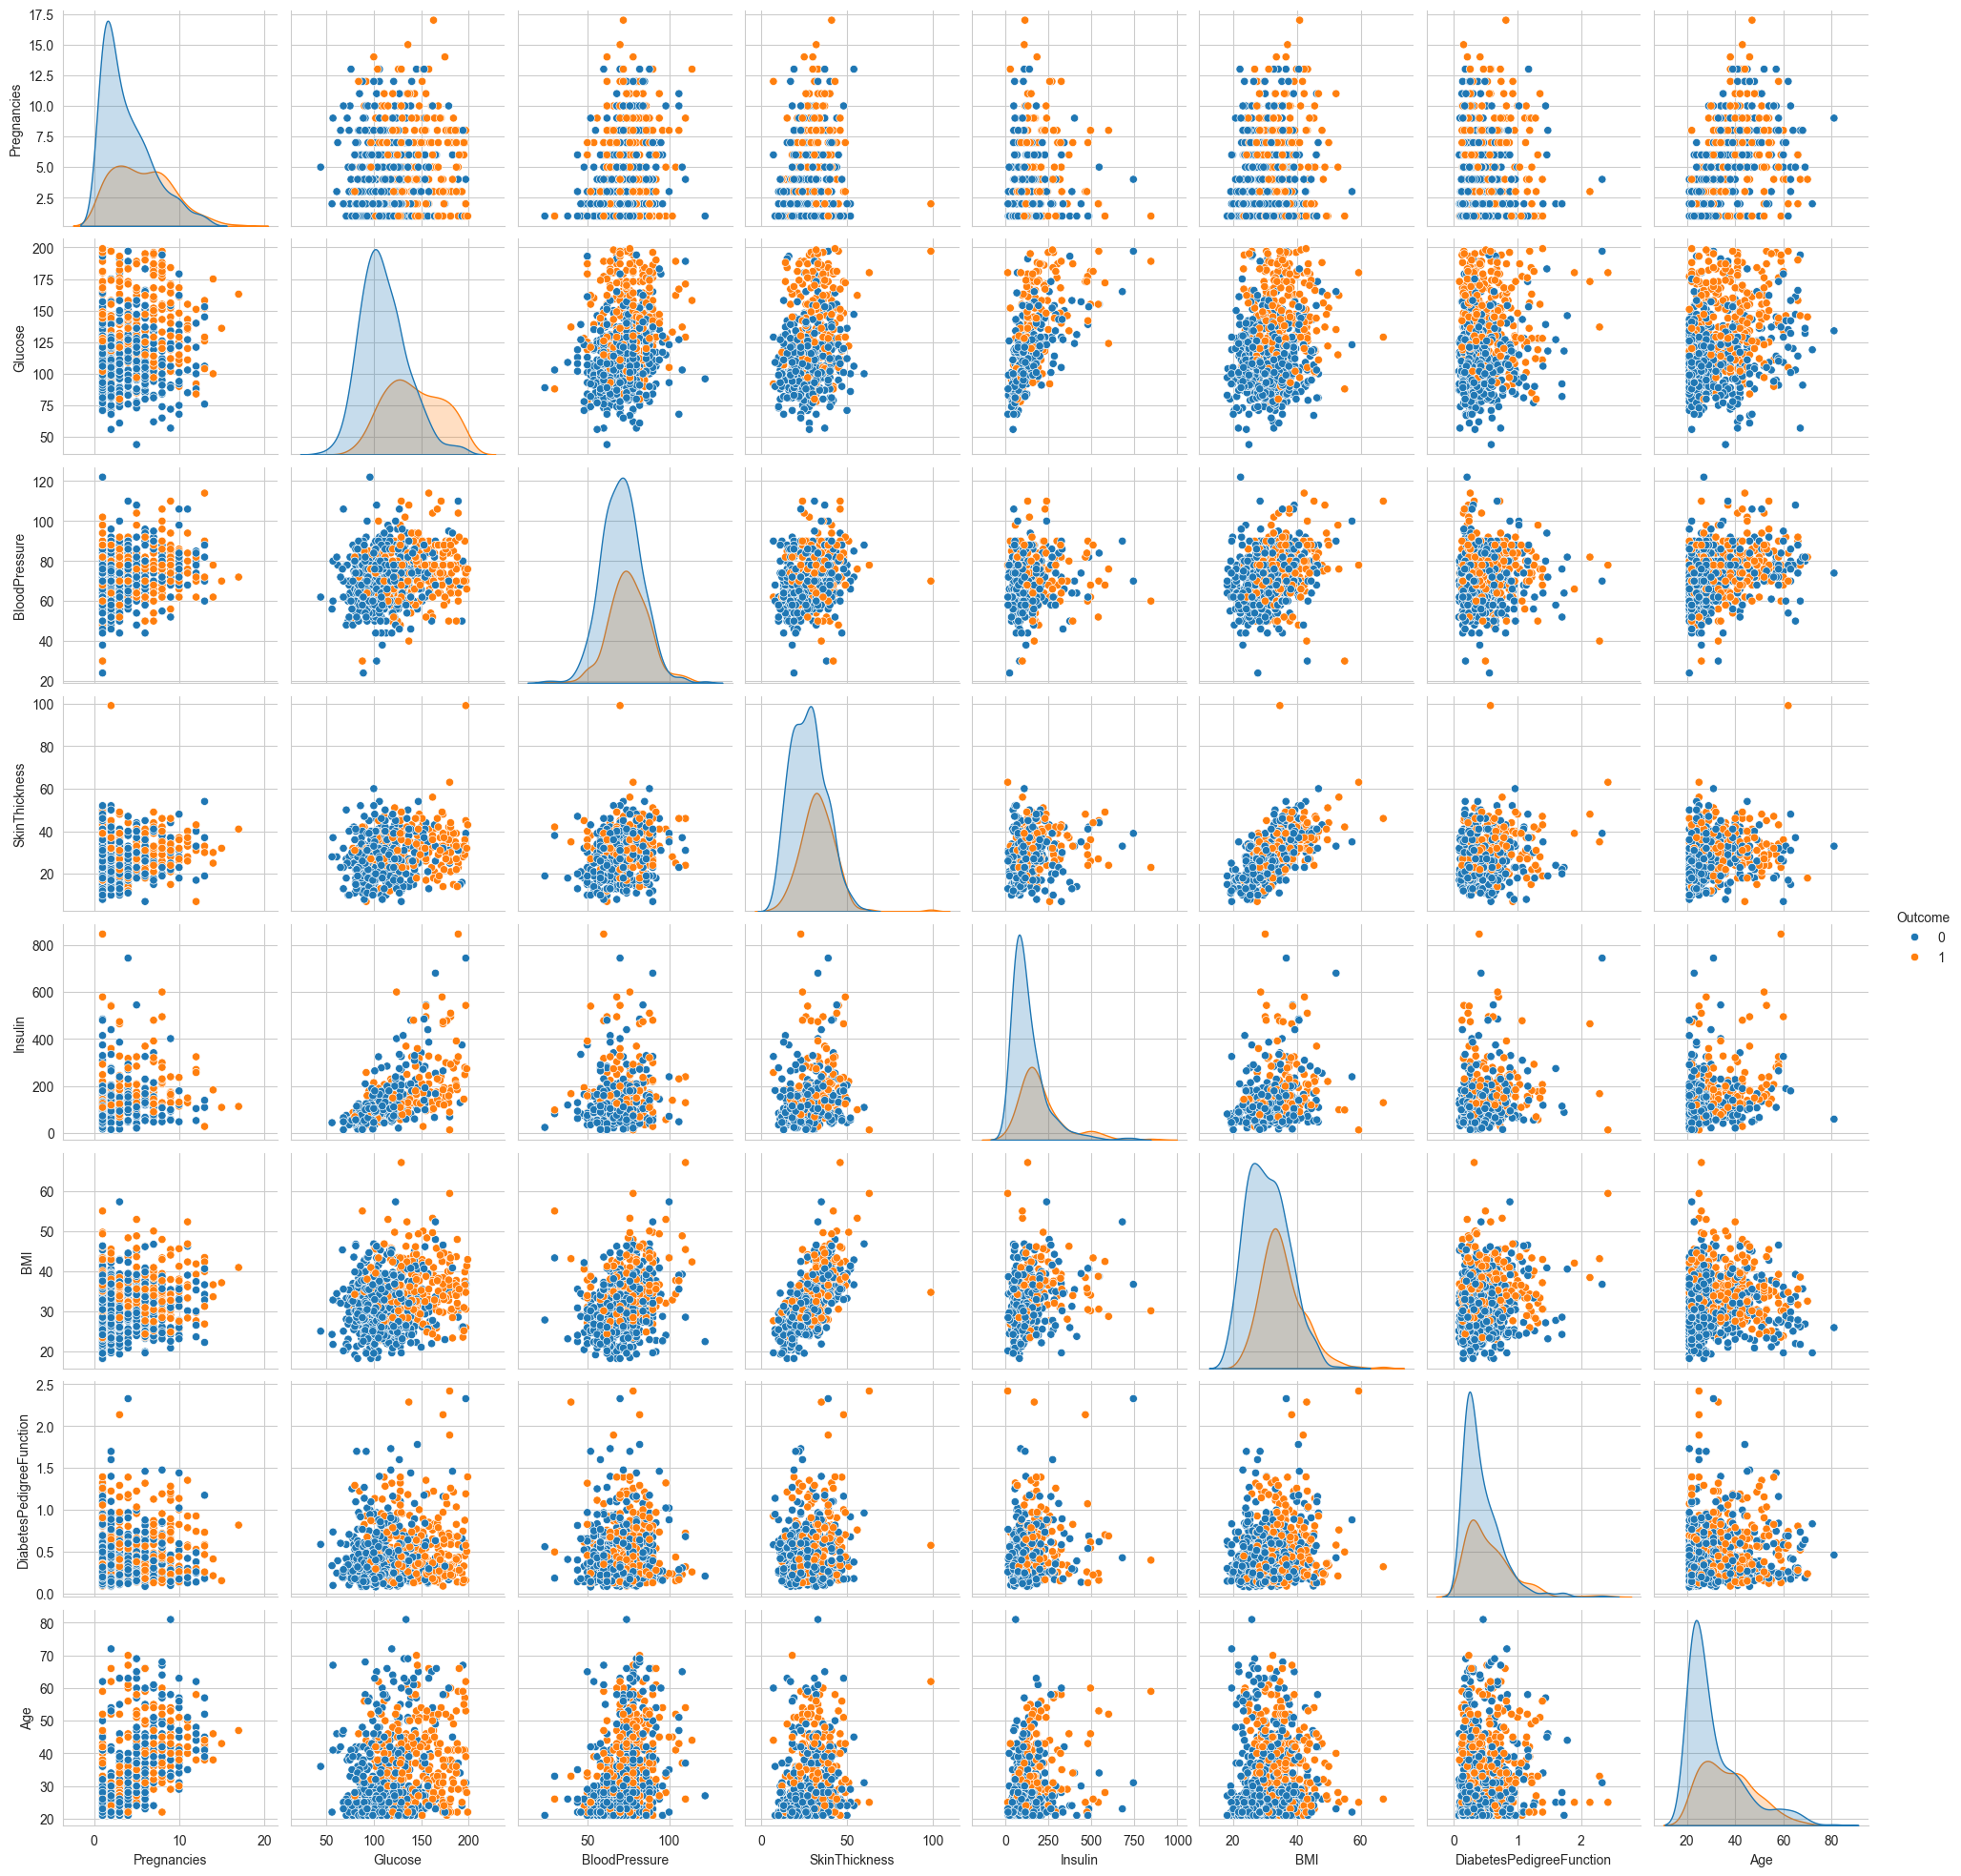

In [83]:
sns.pairplot(df,hue='Outcome') 

In [84]:
# Fill the NaN values according to their distribution.
df_new['Pregnancies'].fillna(df_new['Pregnancies'].median(),inplace=True)
df_new['Glucose'].fillna(df_new['Glucose'].mean(),inplace=True)
df_new['BloodPressure'].fillna(df_new['BloodPressure'].mean(),inplace=True)
df_new['SkinThickness'].fillna(df_new['SkinThickness'].median(),inplace=True)
df_new['Insulin'].fillna(df_new['Insulin'].median(),inplace=True)
df_new['BMI'].fillna(df_new['BMI'].median(),inplace=True)

In [85]:
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<b>Plotting after NaN removal</b>

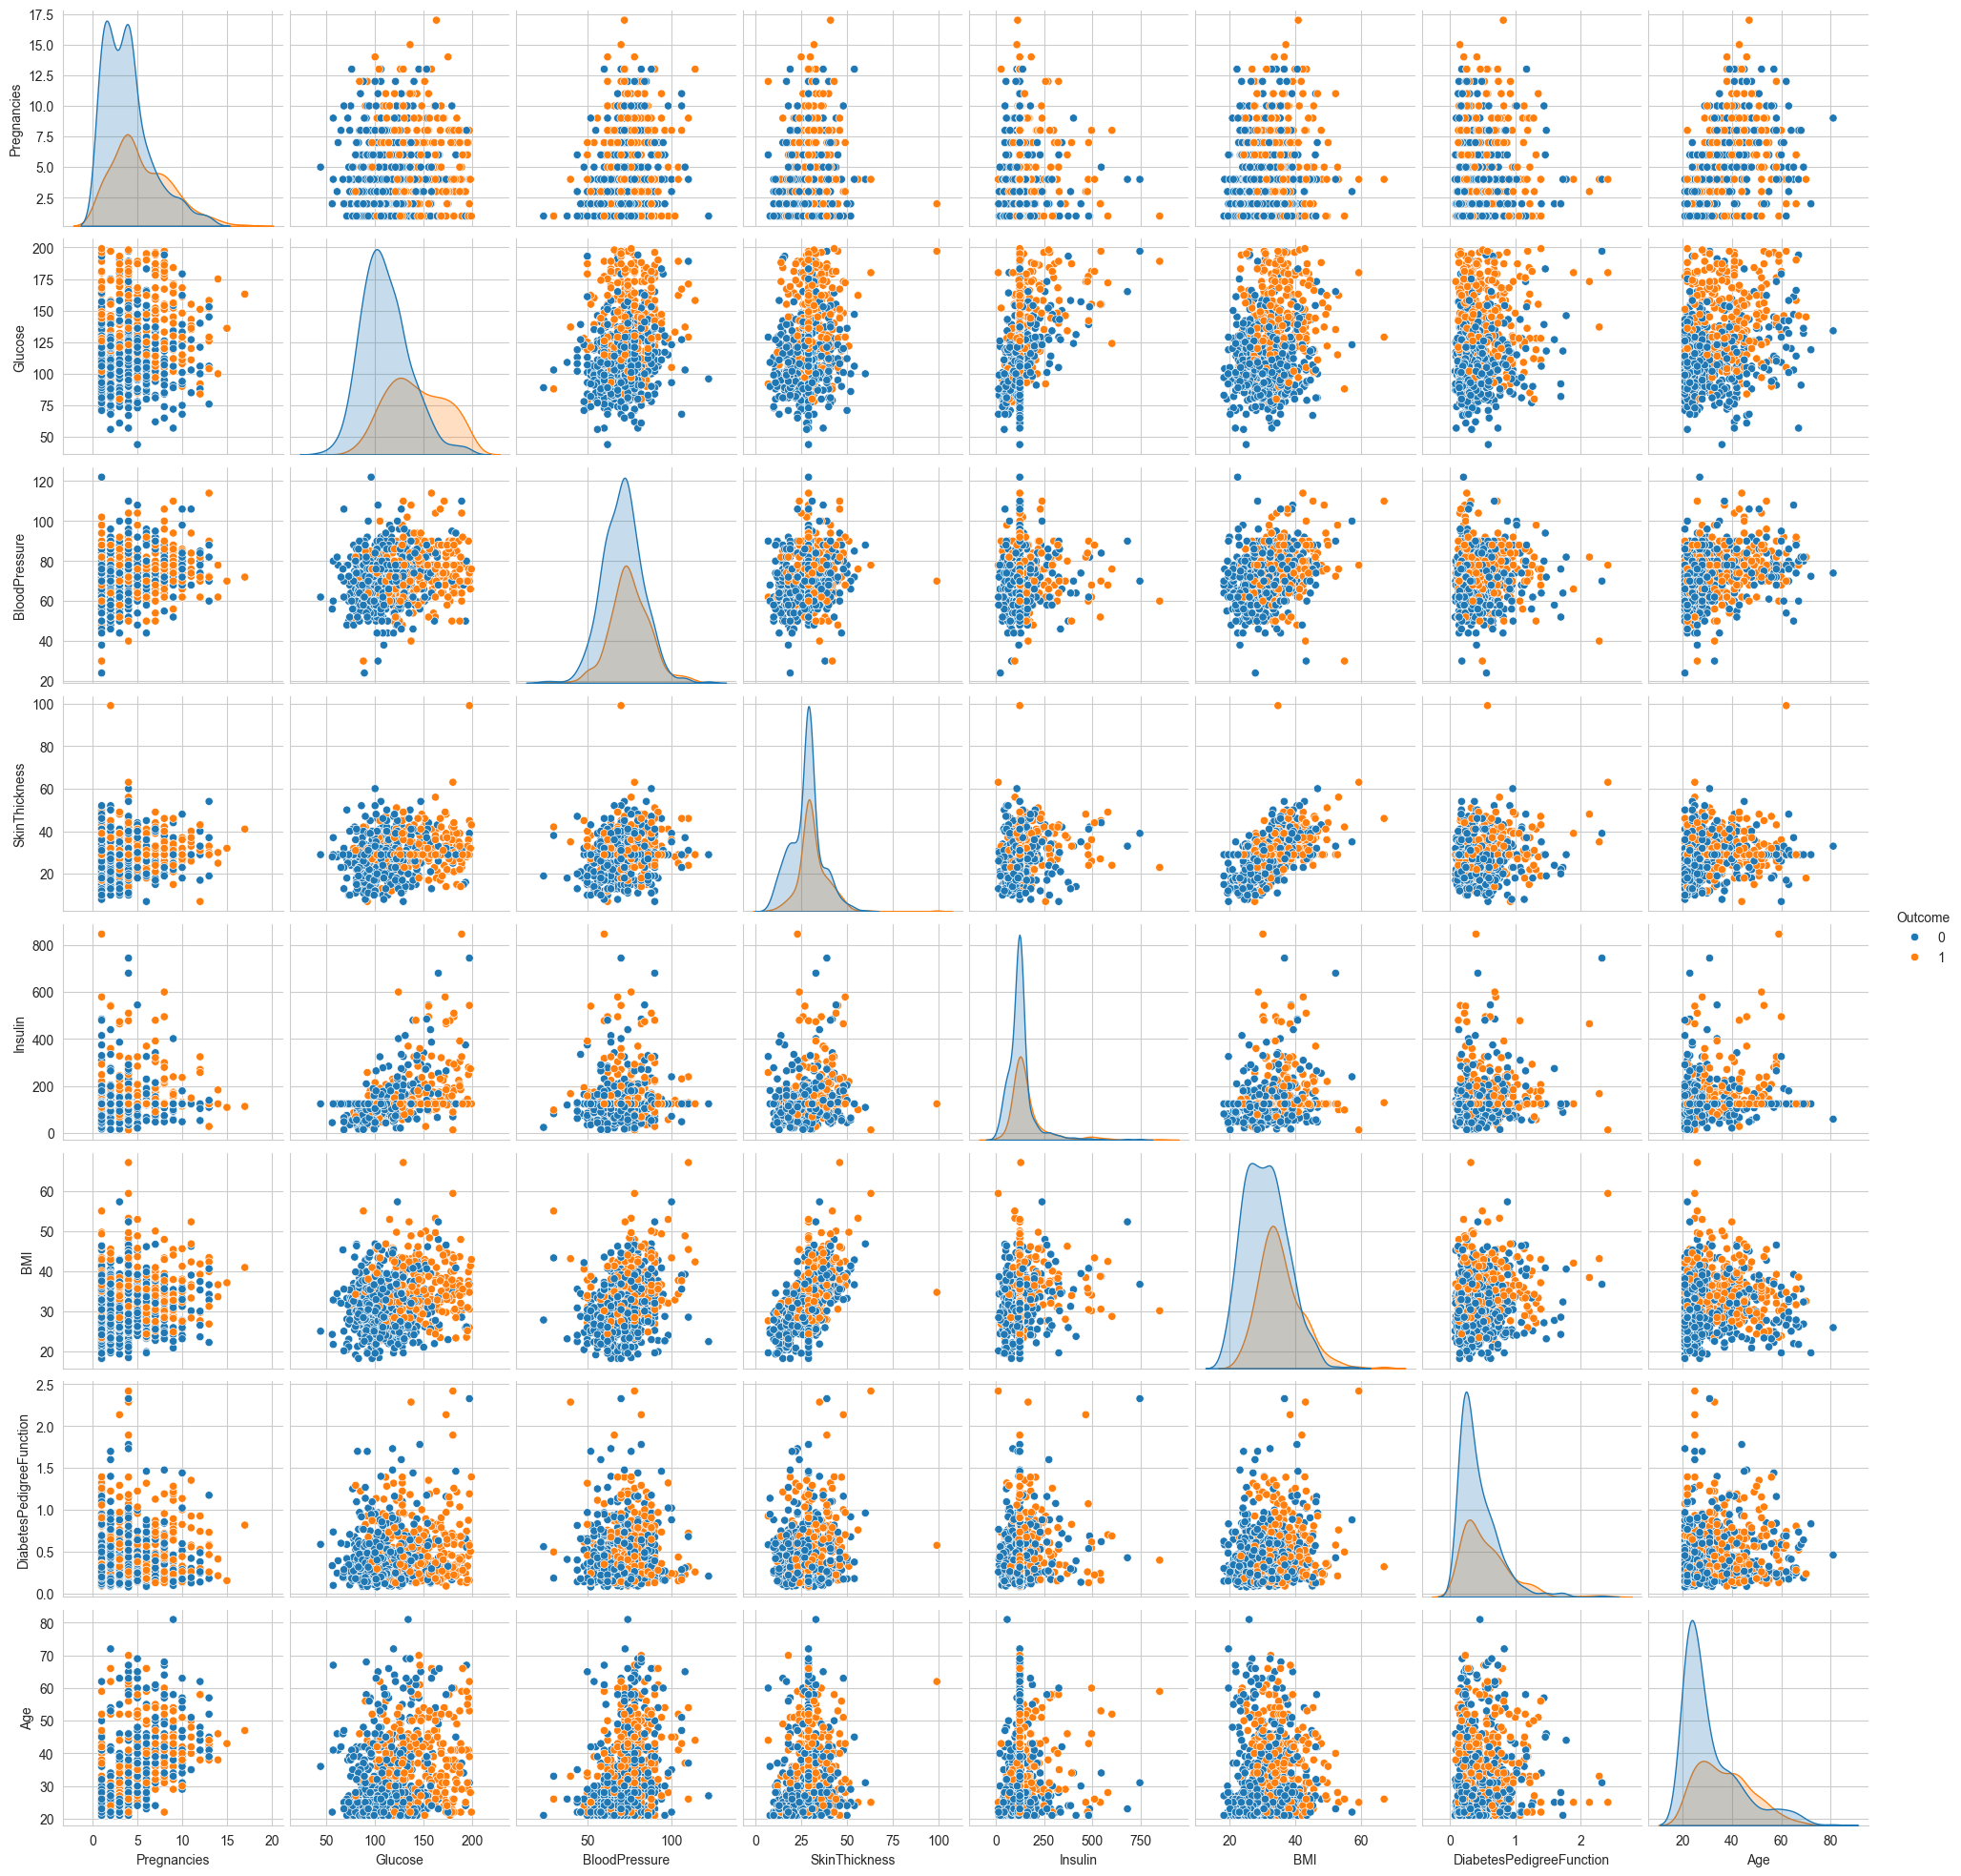

In [86]:
sns.pairplot(df,hue='Outcome') 

<Axes: >

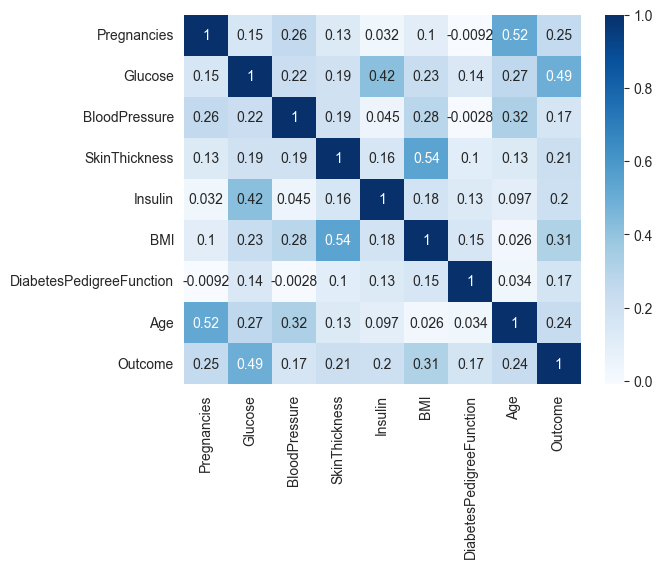

In [87]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

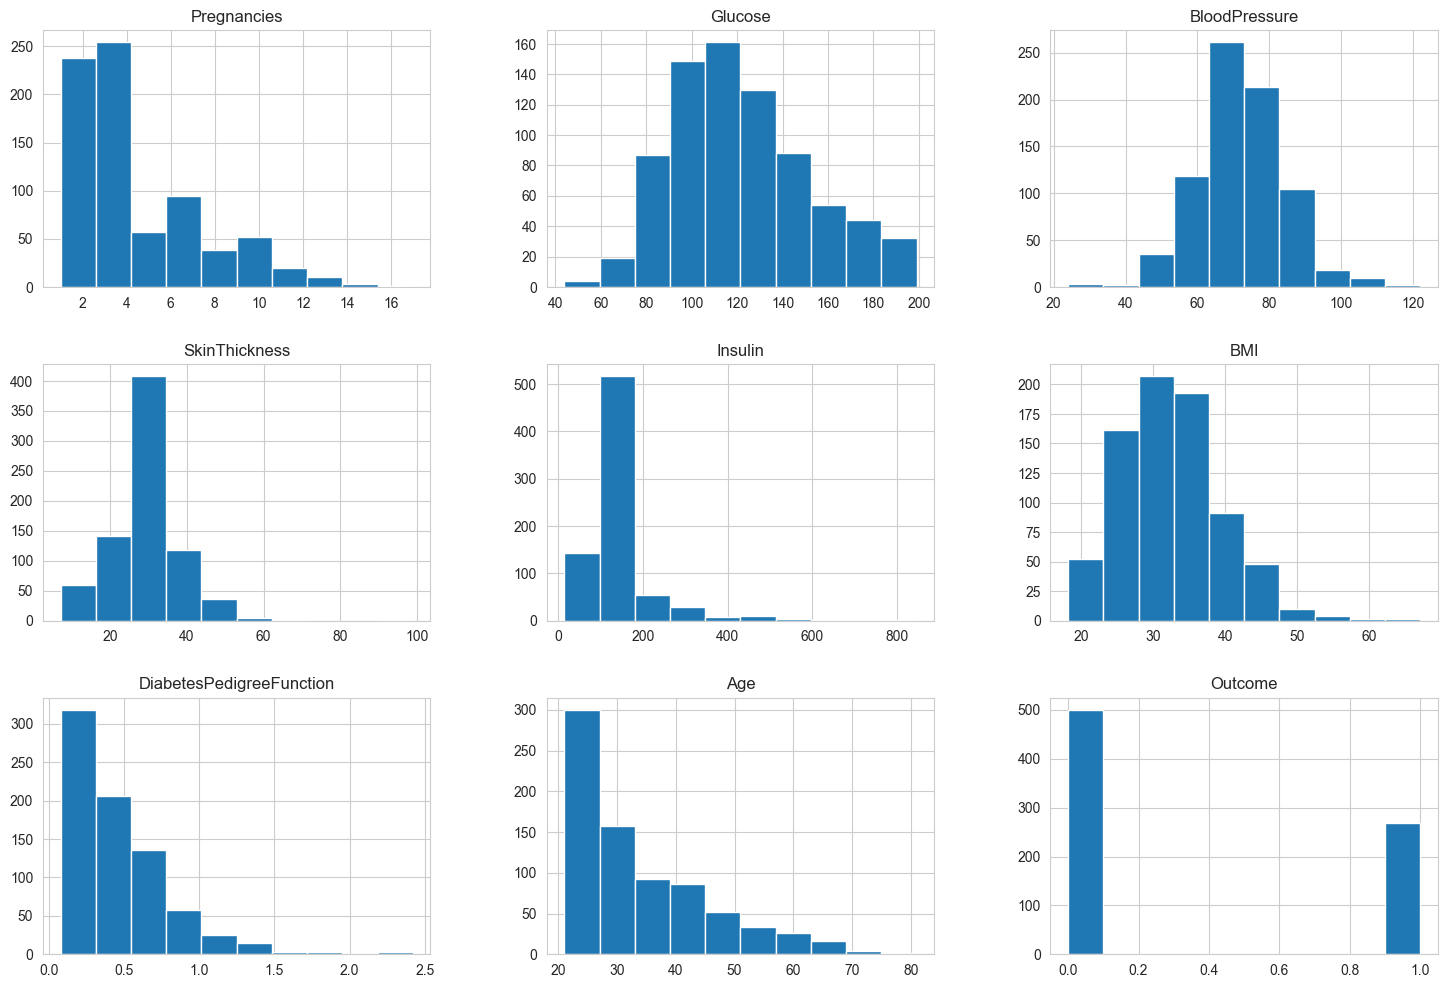

In [88]:
df.hist(figsize=(18,12))
plt.show()

<Axes: xlabel='SkinThickness'>

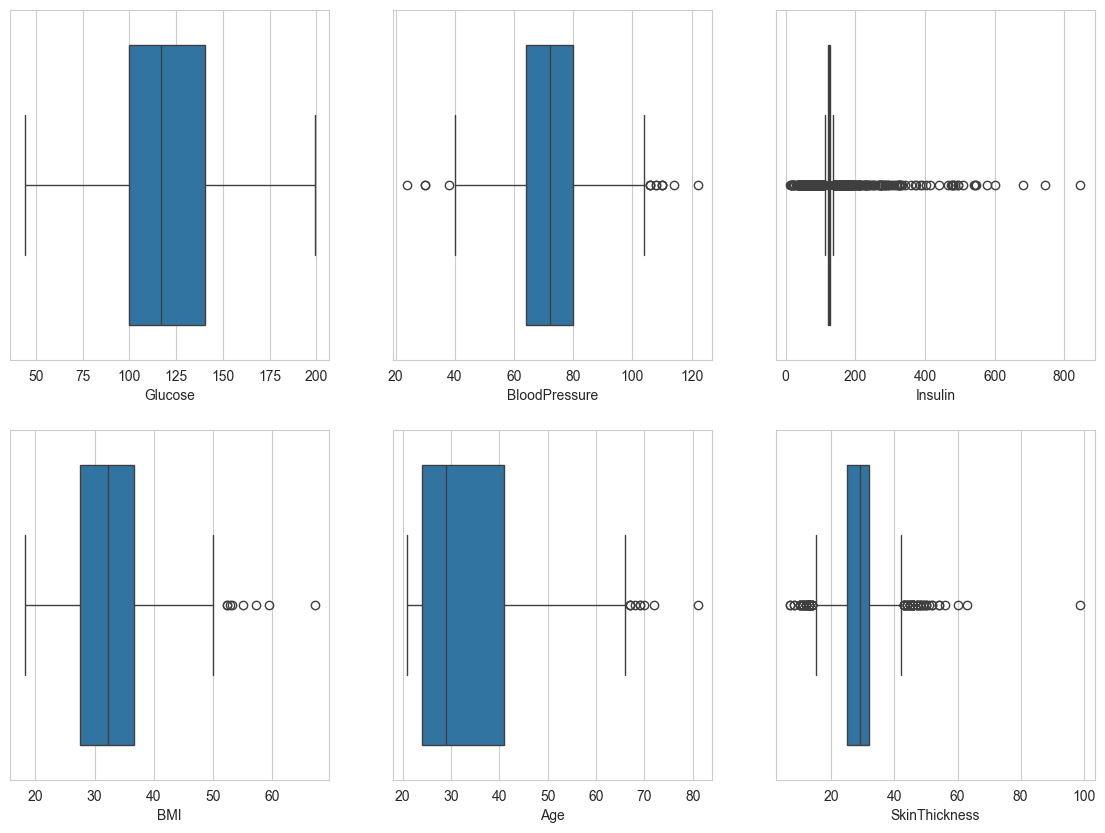

In [89]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df)


## Feature selection

<Axes: xlabel='Outcome', ylabel='Insulin'>

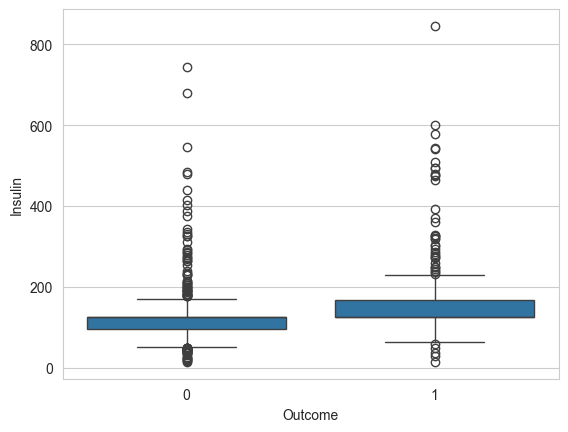

In [90]:
sns.boxplot(x='Outcome',y='Insulin',data=df)

In [91]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Outcome', ylabel='Age'>

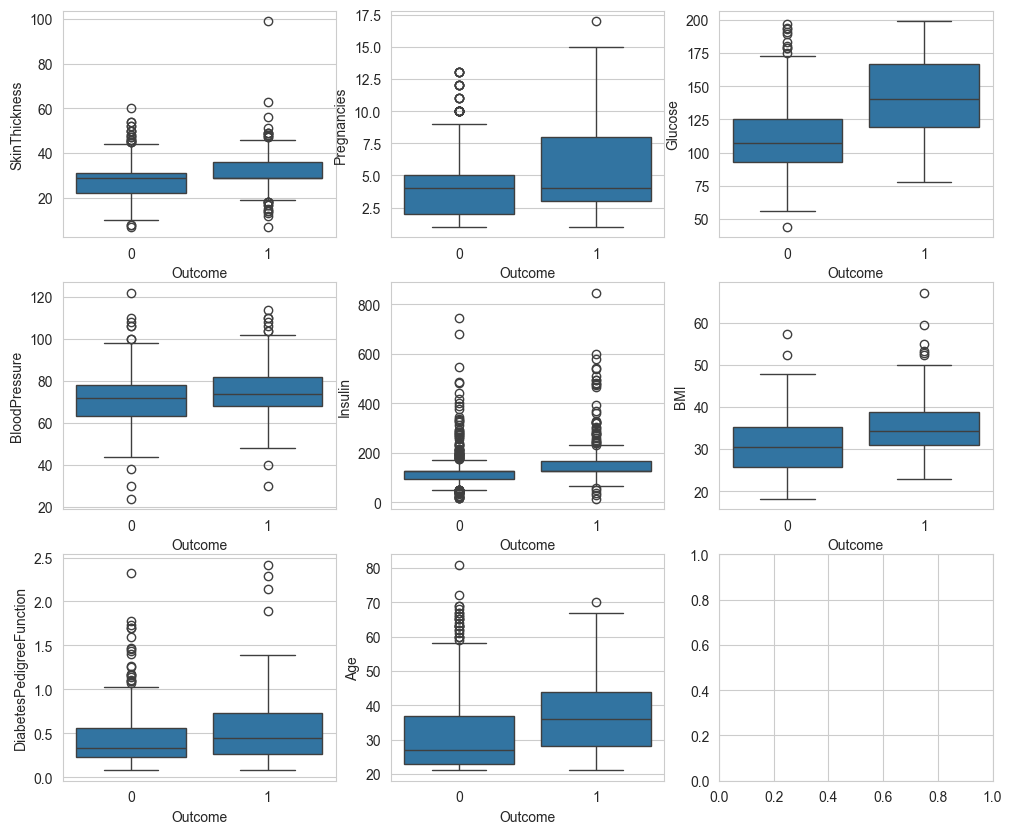

In [92]:
fig,axes = plt.subplots(3,3,figsize=(12,10))
sns.boxplot(x='Outcome',y='SkinThickness',data=df,ax=axes[0,0])
sns.boxplot(x='Outcome',y='Pregnancies',data=df,ax=axes[0,1])
sns.boxplot(x='Outcome',y='Glucose',data=df,ax=axes[0,2])
sns.boxplot(x='Outcome',y='BloodPressure',data=df,ax=axes[1,0])
sns.boxplot(x='Outcome',y='Insulin',data=df,ax=axes[1,1])
sns.boxplot(x='Outcome',y='BMI',data=df,ax=axes[1,2])
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df,ax=axes[2,0])
sns.boxplot(x='Outcome',y='Age',data=df,ax=axes[2,1])

## Train Test Split

In [93]:
X = df.drop(columns='Outcome')
y= df['Outcome']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Model

1. LogisticRegression

In [116]:
from sklearn.linear_model import LogisticRegression
lreg= LogisticRegression(max_iter=500)
lreg.fit(X_train,y_train)

LogisticRegression(max_iter=500)

* the logisticregression of gradient descent dosen't convergence so we want to increse the model, default values (100)

In [117]:
y_pred = lreg.predict(X_test)

## Evaluation of classification algorithm 
* Accuracy : Overall, how often is the classifier correct?
  * Accuracy = TN + TP/ TN+FP+FN+TP
* Precision : When it predicts yes, how often is it correct?
  * precision = TP/ predicted Yes
* Recall/True positive Rate : When it's actually yes, how often does it predict yes?
  * Recall = TP/ Actual yes
* F1 Score

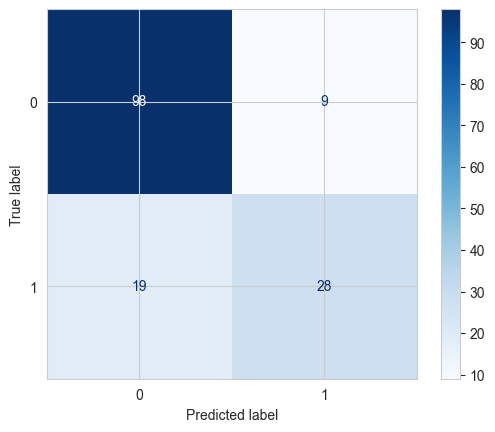

In [118]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
ConfusionMatrixDisplay.from_estimator(lreg,X_test,y_test,cmap='Blues')

*  The confusion matrix classifier  predicting the presence of a disease.
* The classifier made a total 154 predictions Out of those 154 cases, the classifire predicted "yes" 37 times and "no" 117 times.
* In reality, 47 patients in the sample have the diabeties, and 107 patients do not.

In [119]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

Actual  Predicted
661       1          1
122       0          0
113       0          0
14        1          1
529       0          0
..      ...        ...
476       1          0
482       0          0
230       1          1
527       0          0
380       0          0

[154 rows x 2 columns]

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [121]:
print(f'Acciracy Score {accuracy_score(y_test,y_pred)}')

Acciracy Score 0.8181818181818182


So, We get a accuracy score of 0.81 using LogisticRegression.

## By using the oversampling technique SMOTE

In [125]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Apply smote to the training data only
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

In [126]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=500)
lr.fit(X_train_resampled,y_train_resampled)
y_pred1 = lr.predict(X_test)

In [128]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       107
           1       0.64      0.79      0.70        47

    accuracy                           0.80       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.82      0.80      0.80       154



In [129]:
print(f'Acciracy Score {accuracy_score(y_test,y_pred1)}')

Acciracy Score 0.7987012987012987


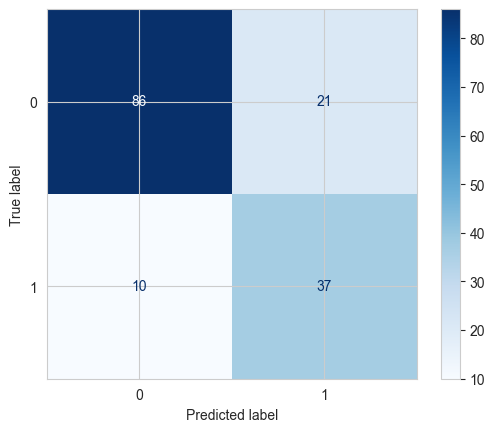

In [130]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test,cmap='Blues')

In [132]:
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred)

d = pd.DataFrame({
    'Resample accuracy score': [accuracy1],
    'Original accuracy score': [accuracy2]
})

print(d)

   Resample accuracy score  Original accuracy score
0                 0.798701                 0.818182


<b> After using the oversampling technique Model accuracy is decrease as compare to imbalance data accuracy score. </b>